# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

import tensorflow as tf
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50V2,EfficientNetB4
from tensorflow.keras.optimizers.legacy import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/"
print(os.listdir(Path))

['images.csv', 'images', 'styles.csv', 'styles']


# Data preparation and visualization

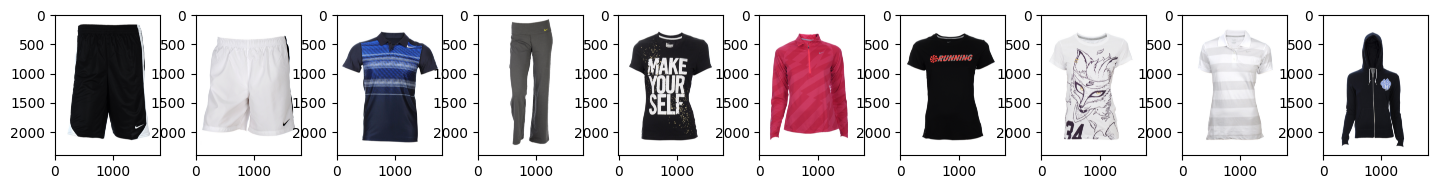

In [4]:
# Plot samples 
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img =  mpimg.imread(Path + 'images/100' + str(i) +'.jpg') # Assign images ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [4]:
images_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv")
styles_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

In [6]:
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [7]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<Axes: ylabel='articleType'>

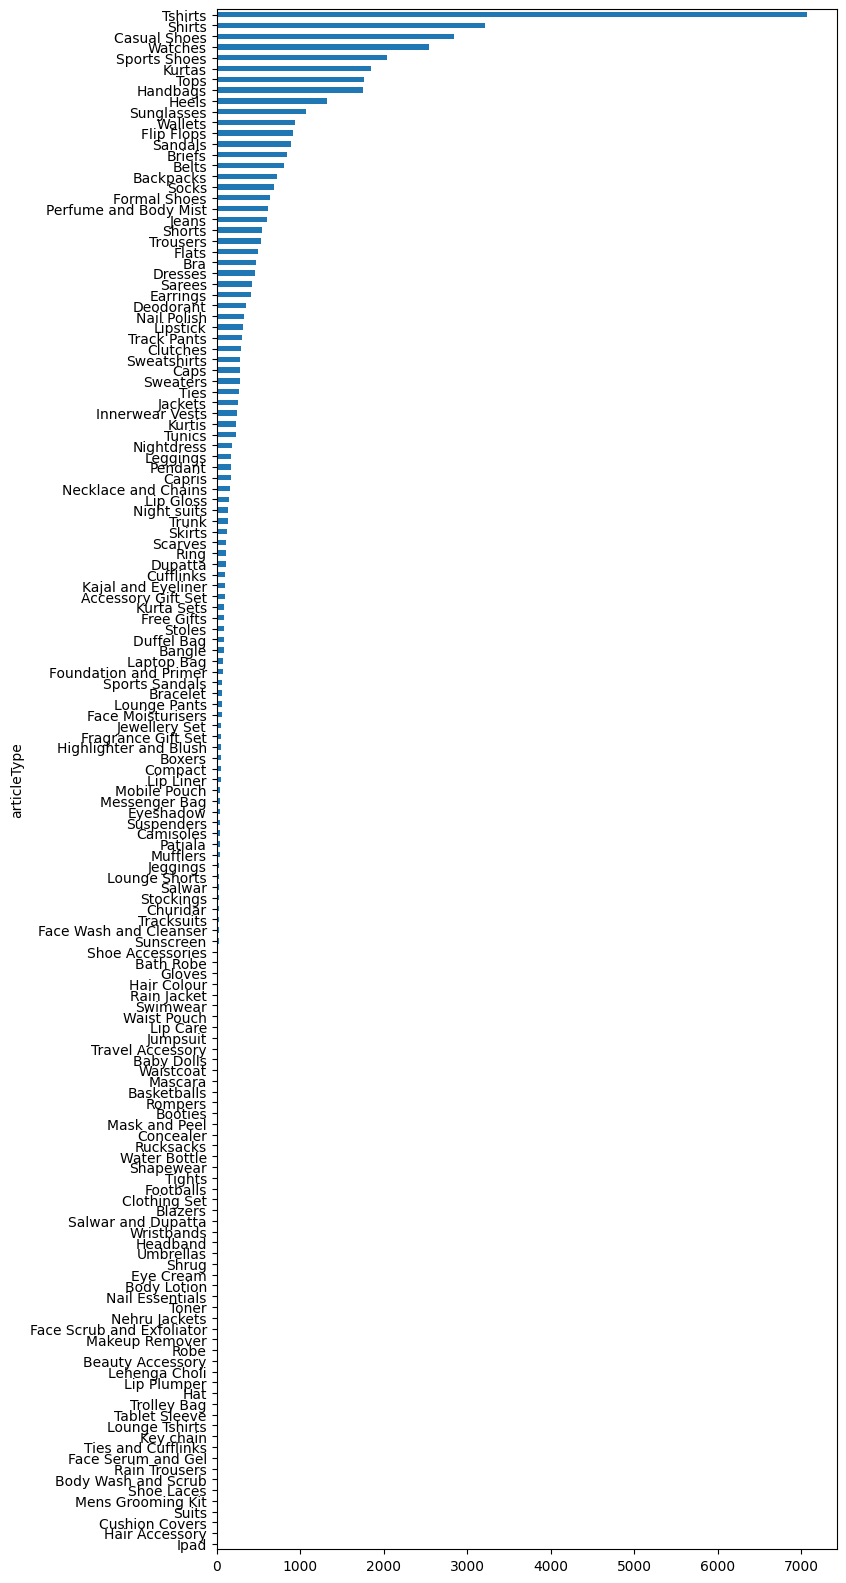

In [5]:
plt.figure(figsize=(8,20))
styles_df.articleType.value_counts().sort_values().plot(kind='barh')

<Axes: xlabel='gender'>

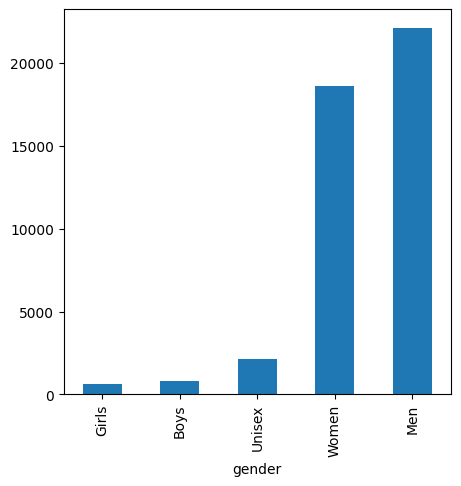

In [6]:
plt.figure(figsize=(5,5))
styles_df.gender.value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='masterCategory'>

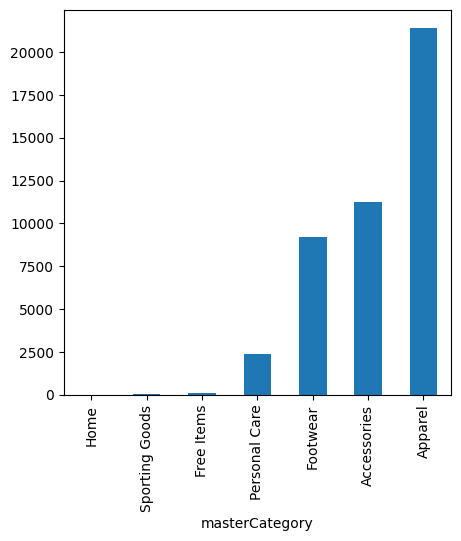

In [7]:
plt.figure(figsize=(5,5))
styles_df.masterCategory.value_counts().sort_values().plot(kind='bar')

<Axes: ylabel='subCategory'>

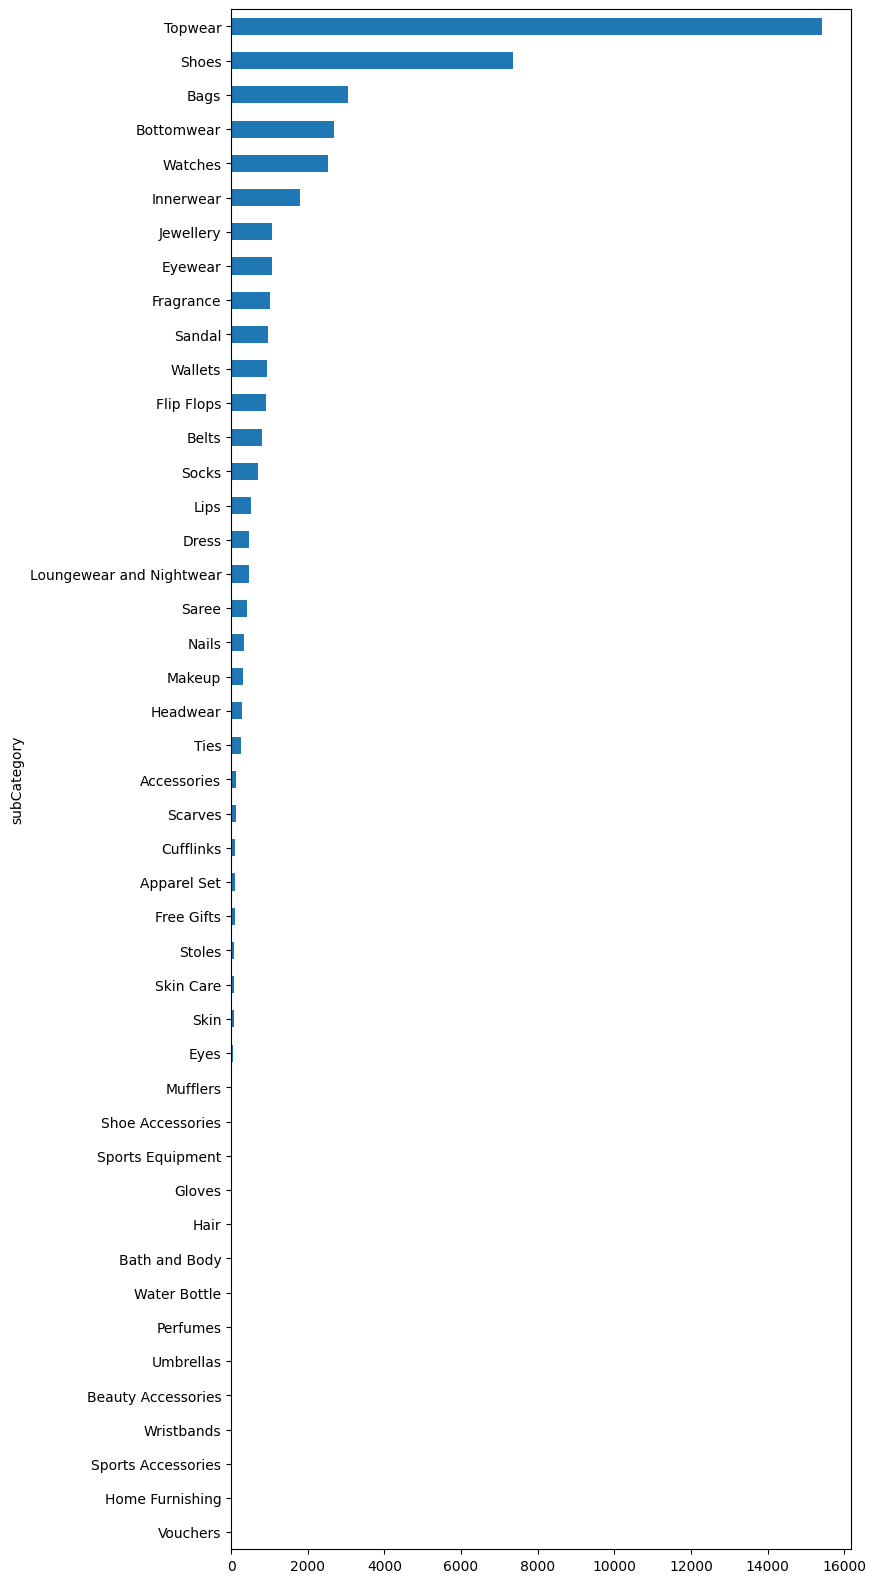

In [8]:
plt.figure(figsize=(8,20))
styles_df.subCategory.value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='baseColour'>

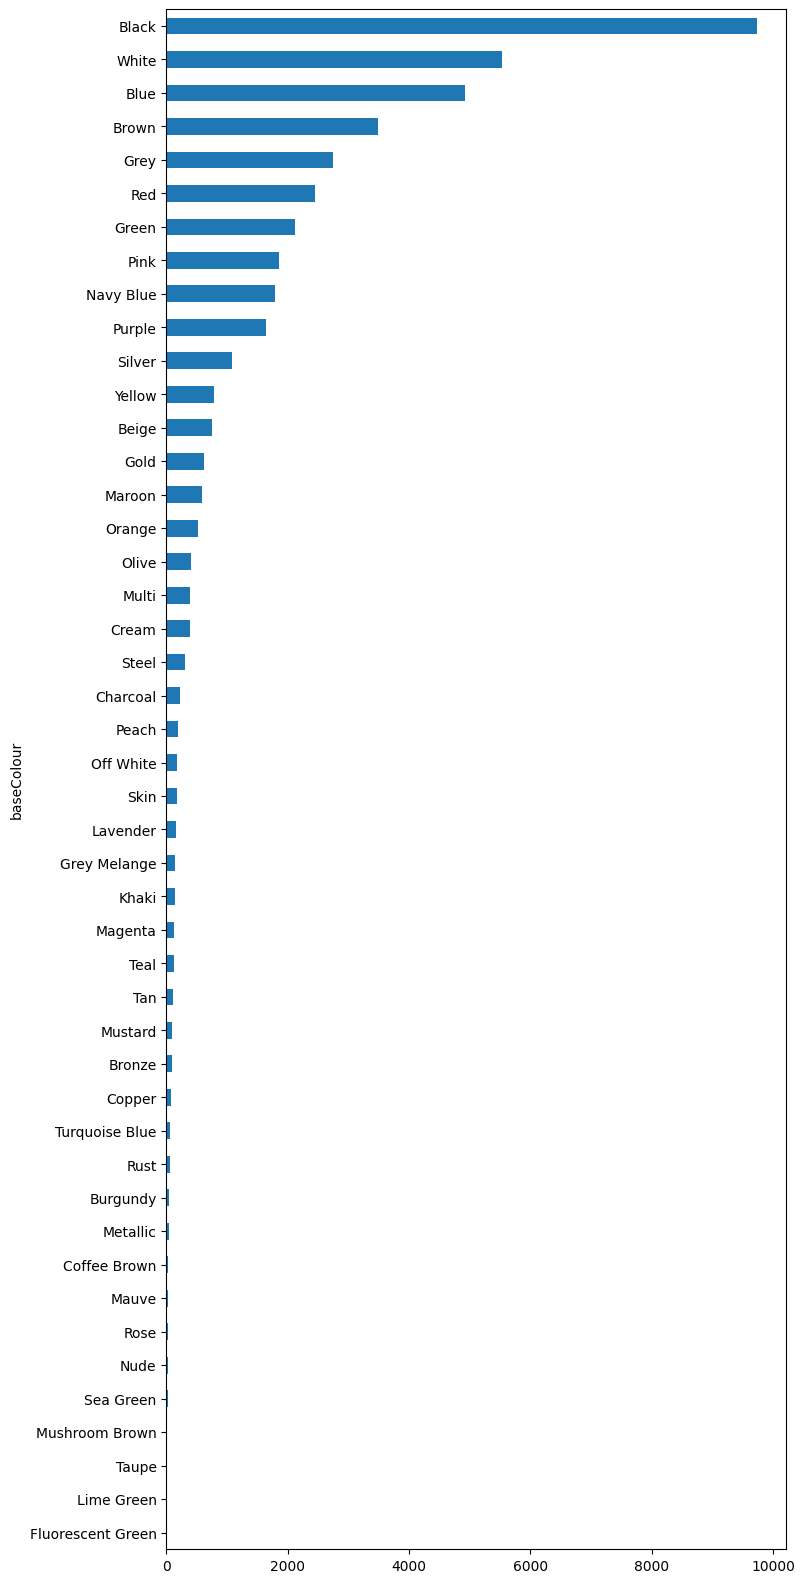

In [9]:
plt.figure(figsize=(8,20))
styles_df.baseColour.value_counts().sort_values().plot(kind='barh')

<Axes: xlabel='season'>

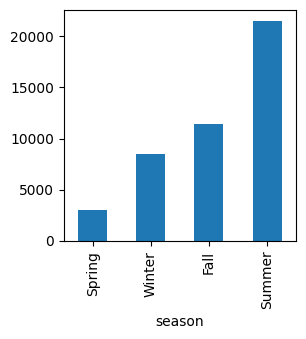

In [10]:
plt.figure(figsize=(3,3))
styles_df.season.value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='usage'>

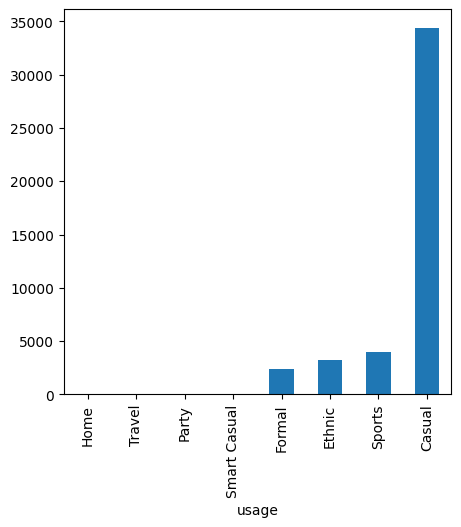

In [11]:
plt.figure(figsize=(5,5))
styles_df.usage.value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='year'>

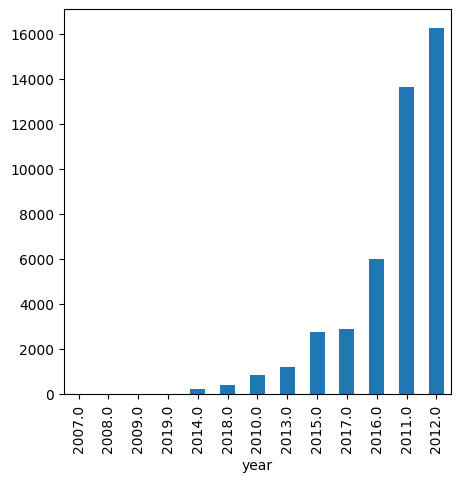

In [12]:
plt.figure(figsize=(5,5))
styles_df.year.value_counts().sort_values().plot(kind='bar')

In [5]:
styles_df['filename'] = styles_df['id'].astype(str) + '.jpg'

In [8]:
image_files = os.listdir(Path + 'images')

In [9]:
styles_df['is_present'] = styles_df['filename'].apply(lambda x: x in image_files)

In [10]:
styles_df = styles_df[styles_df['is_present']].reset_index(drop=True)

In [11]:
styles_df['image'] = styles_df.apply(lambda row: os.path.join(Path, 'images', str(row['id']) + ".jpg"), axis=1)

In [12]:
styles_df.shape

(44419, 13)

In [94]:
styles_df.select_dtypes(['object']).columns

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName', 'filename', 'image'],
      dtype='object')

In [13]:
styles_df['season'] = styles_df['season'].fillna("Unknown")

In [14]:
styles_df['baseColour'] = styles_df['baseColour'].fillna("Unknown")

In [85]:
# Converting categorical data to numerical data
#styles_df['gender'] = styles_df['gender'].astype('category').cat.codes
#styles_df['articleType'] = styles_df['articleType'].astype('category').cat.codes
#styles_df['baseColour'] = styles_df['baseColour'].astype('category').cat.codes
#styles_df['season'] = styles_df['season'].astype('category').cat.codes
#styles_df['masterCategory'] = styles_df['masterCategory'].astype('category').cat.codes
#styles_df['subCategory'] = styles_df['subCategory'].astype('category').cat.codes
#styles_df['usage'] = styles_df['usage'].astype('category').cat.codes

{0: -1, 1: 0, 2: 1, 3: 2, 4: 3}


In [99]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,is_present,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,True,/kaggle/input/fashion-product-images-dataset/f...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,True,/kaggle/input/fashion-product-images-dataset/f...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,True,/kaggle/input/fashion-product-images-dataset/f...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,True,/kaggle/input/fashion-product-images-dataset/f...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,True,/kaggle/input/fashion-product-images-dataset/f...


# Data Model

In [14]:
#if CUDA (GPU) is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print('GPU not found. Please ensure you have a GPU-enabled TensorFlow version.')

Default GPU Device: /device:GPU:0


In [16]:
train_data, test_data = train_test_split(styles_df, test_size=0.2, random_state=42)

In [15]:
#print(train_data.shape)
#print(test_data.shape)

In [18]:
#Data augmentation for gender
datagen = ImageDataGenerator(rescale=1/255.,)
# ['gender', 'articleType', 'baseColour', 'season']

## Gender

In [19]:
BATCH_SIZE = 32

train_dataset_gender = datagen.flow_from_dataframe(train_data,
                                                    directory = None,
                                                    x_col='image', 
                                                    y_col= 'gender',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    shuffle = False,
                                                    class_mode='categorical')
val_dataset_gender = datagen.flow_from_dataframe(test_data,  
                                                directory = None,
                                                x_col='image', 
                                                y_col='gender',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                shuffle = False,
                                                class_mode='categorical')


Found 35535 validated image filenames belonging to 5 classes.
Found 8884 validated image filenames belonging to 5 classes.


In [47]:
gender_dict=train_dataset_gender.class_indices
gender_list=list(gender_dict.keys())
print(gender_list)

['Boys', 'Girls', 'Men', 'Unisex', 'Women']


In [20]:
base_model = ResNet50(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in base_model.layers:
     layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

#Outputs
x1 = Dense(5, activation = 'softmax', name = 'gender')(x) 
#x2 = Dense(142, activation = 'softmax', name = 'type')(x) 
#x3 = Dense(47, activation = 'softmax', name = 'color')(x) 
#x4 = Dense(4, activation = 'softmax', name = 'season')(x) 

model_gender = Model(inputs = base_model.input, outputs = x1)
model_gender.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [93]:
#model.compile(optimizer='adam',
#              loss={'gender': 'categorical_crossentropy',
#                    'type': 'categorical_crossentropy',
#                   'color': 'categorical_crossentropy',
#                    'season': 'categorical_crossentropy'},
#              metrics={'gender': 'accuracy',
#                       'type': 'accuracy',
#                       'color': 'accuracy',
#                       'season': 'accuracy'})

In [ ]:
model_gender.summary()

A better approach was to include callbacks and early stopping as well as saving checkpoints to prevent overfitting.

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping( monitor="val_accuracy",
    patience=2,
    mode="max",
)

mc = ModelCheckpoint('/kaggle/working/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [25]:
with tf.device('/GPU:0'):  # Use GPU:0, GPU P100
    history = model_gender.fit(train_dataset_gender,
                        validation_data=val_dataset_gender,
                        epochs=10, callbacks=[es, mc])
                       

Epoch 1/10
1111/1111 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8413
Epoch 1: val_accuracy improved from -inf to 0.85119, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1062s 956ms/step - loss: 0.4276 - accuracy: 0.8413 - val_loss: 0.4193 - val_accuracy: 0.8512
Epoch 2/10
1111/1111 [==============================] - ETA: 0s - loss: 0.4103 - accuracy: 0.8472
Epoch 2: val_accuracy did not improve from 0.85119
1111/1111 [==============================] - 1053s 948ms/step - loss: 0.4103 - accuracy: 0.8472 - val_loss: 0.4692 - val_accuracy: 0.8254
Epoch 3/10
1111/1111 [==============================] - ETA: 0s - loss: 0.3888 - accuracy: 0.8566
Epoch 3: val_accuracy improved from 0.85119 to 0.85626, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1039s 935ms/step - loss: 0.3888 - accuracy: 0.8566 - val_loss: 0.3945 - val_accuracy: 0.8563
Epoch 4/10
1111/1111 [==================

In [26]:
# Evaluate the model on the validation dataset
evaluation = model_gender.evaluate(val_dataset_gender)

# Extract the loss and accuracy values for each output
gender_loss, gender_accuracy = evaluation[0], evaluation[1]

# Print or log the evaluation results
print(f'Gender - Loss: {gender_loss:.4f}, Accuracy: {gender_accuracy:.2%}')


278/278 [==============================] - 195s 701ms/step - loss: 0.5322 - accuracy: 0.8225
Gender - Loss: 0.5322, Accuracy: 82.25%


In [48]:
model_gender.save("model_gender1.h5")

In [49]:
from IPython.display import FileLink

# Replace 'your_model.h5' with the actual file name
FileLink('model_gender1.h5')

/kaggle/working/model_gender1.h5

## Article Type

In [41]:
datagenerator = ImageDataGenerator(rescale=1/255., validation_split = 0.2,)

In [42]:
BATCH_SIZE = 32

train_dataset_type = datagenerator.flow_from_dataframe(styles_df,
                                                    directory = None,
                                                    x_col='image', 
                                                    y_col= 'articleType',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                     subset = 'training',
                                                    shuffle = False,
                                                    class_mode='categorical')
val_dataset_type = datagenerator.flow_from_dataframe(styles_df,  
                                                directory = None,
                                                x_col='image', 
                                                y_col='articleType',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                               subset = 'validation',
                                                shuffle = False,
                                                class_mode='categorical')

Found 35536 validated image filenames belonging to 142 classes.
Found 8883 validated image filenames belonging to 142 classes.


In [52]:
type_dict=train_dataset_type.class_indices
type_list=list(type_dict.keys())
print(type_list)

['Accessory Gift Set', 'Baby Dolls', 'Backpacks', 'Bangle', 'Basketballs', 'Bath Robe', 'Beauty Accessory', 'Belts', 'Blazers', 'Body Lotion', 'Body Wash and Scrub', 'Booties', 'Boxers', 'Bra', 'Bracelet', 'Briefs', 'Camisoles', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clothing Set', 'Clutches', 'Compact', 'Concealer', 'Cufflinks', 'Cushion Covers', 'Deodorant', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Eye Cream', 'Eyeshadow', 'Face Moisturisers', 'Face Scrub and Exfoliator', 'Face Serum and Gel', 'Face Wash and Cleanser', 'Flats', 'Flip Flops', 'Footballs', 'Formal Shoes', 'Foundation and Primer', 'Fragrance Gift Set', 'Free Gifts', 'Gloves', 'Hair Accessory', 'Hair Colour', 'Handbags', 'Hat', 'Headband', 'Heels', 'Highlighter and Blush', 'Innerwear Vests', 'Ipad', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Kajal and Eyeliner', 'Key chain', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lehenga Choli', 'Lip Care', 'Lip Gloss', 'Lip Liner'

In [44]:
base_model = ResNet50(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in base_model.layers:
     layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

#Outputs
#x1 = Dense(5, activation = 'softmax', name = 'gender')(x) 
x2 = Dense(142, activation = 'softmax', name = 'type')(x) 
#x3 = Dense(47, activation = 'softmax', name = 'color')(x) 
#x4 = Dense(4, activation = 'softmax', name = 'season')(x) 

model_type = Model(inputs = base_model.input, outputs = x2)
model_type.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_type.summary()

In [45]:
# Model fitting with callbacks
with tf.device('/GPU:0'):  # Use GPU:0, GPU P100
    history = model_type.fit(train_dataset_type,
                        validation_data=val_dataset_type,
                        epochs=10, callbacks=[es, mc])

Epoch 1/10
1111/1111 [==============================] - ETA: 0s - loss: 1.6488 - accuracy: 0.5689
Epoch 1: val_accuracy improved from -inf to 0.64719, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1067s 956ms/step - loss: 1.6488 - accuracy: 0.5689 - val_loss: 1.2262 - val_accuracy: 0.6472
Epoch 2/10
1111/1111 [==============================] - ETA: 0s - loss: 1.1183 - accuracy: 0.6810
Epoch 2: val_accuracy improved from 0.64719 to 0.66070, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1045s 941ms/step - loss: 1.1183 - accuracy: 0.6810 - val_loss: 1.1840 - val_accuracy: 0.6607
Epoch 3/10
1111/1111 [==============================] - ETA: 0s - loss: 0.9806 - accuracy: 0.7109
Epoch 3: val_accuracy improved from 0.66070 to 0.69920, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1053s 948ms/step - loss: 0.9806 - accuracy: 0.7109 - val_loss: 1.0849 - val_accura

In [50]:
# Evaluate the model on the validation dataset
evaluation2 = model_type.evaluate(val_dataset_type)

# Extract the loss and accuracy values for each output
type_loss, type_accuracy = evaluation2[0], evaluation2[1]

# Print or log the evaluation results
print(f'Type - Loss: {type_loss:.4f}, Accuracy: {type_accuracy:.2%}')

278/278 [==============================] - 201s 724ms/step - loss: 0.9893 - accuracy: 0.7148
Type - Loss: 0.9893, Accuracy: 71.48%


In [51]:
model_type.save("model_type.h5")

In [53]:
from IPython.display import FileLink

# Replace 'your_model.h5' with the actual file name
FileLink('model_type.h5')

/kaggle/working/model_type.h5

## Season

In [17]:
datagenerator = ImageDataGenerator(rescale=1/255., validation_split = 0.2,)

In [18]:
BATCH_SIZE = 32

train_dataset_season = datagenerator.flow_from_dataframe(styles_df,
                                                    directory = None,
                                                    x_col='image', 
                                                    y_col= 'season',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    shuffle = False,
                                                    class_mode='categorical')

val_dataset_season = datagenerator.flow_from_dataframe(styles_df,  
                                                directory = None,
                                                x_col='image', 
                                                y_col='season',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                shuffle = False,
                                                class_mode='categorical')

Found 35536 validated image filenames belonging to 5 classes.
Found 8883 validated image filenames belonging to 5 classes.


In [25]:
season_dict=train_dataset_season.class_indices
season_list=list(season_dict.keys())
print(season_list)

['Fall', 'Spring', 'Summer', 'Unknown', 'Winter']


In [19]:
base_model = ResNet50(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in base_model.layers:
     layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

#Outputs
#x1 = Dense(5, activation = 'softmax', name = 'gender')(x) 
#x2 = Dense(142, activation = 'softmax', name = 'type')(x) 
#x3 = Dense(47, activation = 'softmax', name = 'color')(x) 
x4 = Dense(5, activation = 'softmax', name = 'season')(x) 

model_season = Model(inputs = base_model.input, outputs = x4)
model_season.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model_season.summary()

In [20]:
# Model fitting with callbacks
with tf.device('/GPU:0'):  # Use GPU:0, GPU P100
    history = model_season.fit(train_dataset_season,
                        validation_data=val_dataset_season,
                        epochs=10, callbacks=[es, mc])

Epoch 1/10
1111/1111 [==============================] - ETA: 0s - loss: 1.0494 - accuracy: 0.5542
Epoch 1: val_accuracy improved from -inf to 0.54948, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1205s 1s/step - loss: 1.0494 - accuracy: 0.5542 - val_loss: 1.1418 - val_accuracy: 0.5495
Epoch 2/10
1111/1111 [==============================] - ETA: 0s - loss: 0.8364 - accuracy: 0.6407
Epoch 2: val_accuracy improved from 0.54948 to 0.60362, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1187s 1s/step - loss: 0.8364 - accuracy: 0.6407 - val_loss: 0.9133 - val_accuracy: 0.6036
Epoch 3/10
1111/1111 [==============================] - ETA: 0s - loss: 0.7929 - accuracy: 0.6626
Epoch 3: val_accuracy improved from 0.60362 to 0.63301, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1092s 983ms/step - loss: 0.7929 - accuracy: 0.6626 - val_loss: 0.8764 - val_accuracy: 0.

In [21]:
# Evaluate the model on the validation dataset
evaluation3 = model_season.evaluate(val_dataset_season)

# Extract the loss and accuracy values for each output
season_loss, season_accuracy = evaluation3[0], evaluation3[1]

# Print or log the evaluation results
print(f'Season - Loss: {season_loss:.4f}, Accuracy: {season_accuracy:.2%}')

278/278 [==============================] - 165s 591ms/step - loss: 0.9951 - accuracy: 0.5686


NameError: name 'type_loss' is not defined

In [22]:
# Print or log the evaluation results
print(f'Season - Loss: {season_loss:.4f}, Accuracy: {season_accuracy:.2%}')

Season - Loss: 0.9951, Accuracy: 56.86%


In [23]:
model_season.save("model_season.h5")

In [24]:
from IPython.display import FileLink

# Replace 'your_model.h5' with the actual file name
# FileLink('model_season.h5')
FileLink('best_model.h5')

/kaggle/working/best_model.h5

## Colour

In [26]:
BATCH_SIZE = 32

train_dataset_color = datagenerator.flow_from_dataframe(styles_df,
                                                    directory = None,
                                                    x_col='image', 
                                                    y_col= 'baseColour',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    shuffle = False,
                                                    class_mode='categorical')
val_dataset_color = datagenerator.flow_from_dataframe(styles_df,  
                                                directory = None,
                                                x_col='image', 
                                                y_col='baseColour',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                shuffle = False,
                                                class_mode='categorical')

Found 35536 validated image filenames belonging to 47 classes.
Found 8883 validated image filenames belonging to 47 classes.


In [27]:
base_model = ResNet50(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in base_model.layers:
     layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

#Outputs
#x1 = Dense(5, activation = 'softmax', name = 'gender')(x) 
#x2 = Dense(142, activation = 'softmax', name = 'type')(x) 
x3 = Dense(47, activation = 'softmax', name = 'color')(x) 
#x4 = Dense(4, activation = 'softmax', name = 'season')(x) 

model_color = Model(inputs = base_model.input, outputs = x3)
model_color.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_color.summary()

In [28]:
# Model fitting with callbacks
with tf.device('/GPU:0'):  # Use GPU:0, GPU P100
    history = model_color.fit(train_dataset_color,
                        validation_data=val_dataset_color,
                        epochs=10, callbacks=[es, mc])

Epoch 1/10
1111/1111 [==============================] - ETA: 0s - loss: 2.6479 - accuracy: 0.3009
Epoch 1: val_accuracy improved from -inf to 0.33086, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 990s 884ms/step - loss: 2.6479 - accuracy: 0.3009 - val_loss: 2.3510 - val_accuracy: 0.3309
Epoch 2/10
1111/1111 [==============================] - ETA: 0s - loss: 2.2420 - accuracy: 0.3529
Epoch 2: val_accuracy improved from 0.33086 to 0.35157, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1110s 999ms/step - loss: 2.2420 - accuracy: 0.3529 - val_loss: 2.2783 - val_accuracy: 0.3516
Epoch 3/10
1111/1111 [==============================] - ETA: 0s - loss: 2.1195 - accuracy: 0.3846
Epoch 3: val_accuracy improved from 0.35157 to 0.35720, saving model to /kaggle/working/best_model.h5
1111/1111 [==============================] - 1095s 985ms/step - loss: 2.1195 - accuracy: 0.3846 - val_loss: 2.3290 - val_accurac

In [29]:
# Evaluate the model on the validation dataset
evaluation4 = model_color.evaluate(val_dataset_color)

# Extract the loss and accuracy values for each output
color_loss, color_accuracy = evaluation4[0], evaluation4[1]

# Print or log the evaluation results
print(f'color - Loss: {color_loss:.4f}, Accuracy: {color_accuracy:.2%}')

278/278 [==============================] - 207s 745ms/step - loss: 2.5199 - accuracy: 0.2891
color - Loss: 2.5199, Accuracy: 28.91%


In [30]:
color_dict=train_dataset_color.class_indices
color_list=list(color_dict.keys())
print(color_list)

['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy', 'Charcoal', 'Coffee Brown', 'Copper', 'Cream', 'Fluorescent Green', 'Gold', 'Green', 'Grey', 'Grey Melange', 'Khaki', 'Lavender', 'Lime Green', 'Magenta', 'Maroon', 'Mauve', 'Metallic', 'Multi', 'Mushroom Brown', 'Mustard', 'Navy Blue', 'Nude', 'Off White', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Red', 'Rose', 'Rust', 'Sea Green', 'Silver', 'Skin', 'Steel', 'Tan', 'Taupe', 'Teal', 'Turquoise Blue', 'Unknown', 'White', 'Yellow']


In [31]:
model_color.save("model_color.h5")

In [32]:
from IPython.display import FileLink

# Replace 'your_model.h5' with the actual file name
FileLink('best_model.h5')

/kaggle/working/best_model.h5